In [57]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [58]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [59]:
train = train.drop(["SalePrice"],axis = 1) 

In [60]:
train.shape

(1460, 80)

In [61]:
test.shape

(1459, 80)

In [63]:
train1 = train.copy()
train1.shape

(1460, 80)

# find numerical missing  columns

In [12]:
num_data = train.select_dtypes(include=["int64","float64"])
num_miss_col = [ val for val in num_data.columns if num_data[val].isnull().sum() > 0 ]
num_miss_col

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

# Find categorical missing columns

In [14]:
cat_data = train.select_dtypes(include="O") 
cat_miss_col = [ val for val in cat_data.columns if cat_data[val].isnull().sum() > 0 ]  
cat_miss_col 

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [52]:
mean_var = ["LotFrontage"]
median_var = ['MasVnrArea', 'GarageYrBlt']
mode_var = ['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',]
cons_var = ['GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [17]:
mean_var_pipe = Pipeline(steps=[("imputer",SimpleImputer(strategy="mean"))])
median_var_pipe = Pipeline(steps=[("imputer",SimpleImputer(strategy="median"))]) 
mode_var_pipe = Pipeline(steps=[("imputer",SimpleImputer(strategy="most_frequent"))])
cons_var_pipe = Pipeline(steps=[("imputer",SimpleImputer(strategy="constant", fill_value="missing"))])

In [36]:
processor = ColumnTransformer(transformers=[("mean_imputer",mean_var_pipe,mean_var),
                                ("median_imputer",median_var_pipe,median_var),
                                ("mode_imputer",mode_var_pipe,mode_var),
                                ("cons_imputer",cons_var_pipe,cons_var)])

In [37]:
processor.fit(train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('mean_imputer', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0))]), ['LotFrontage']), ('median_imputer', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=Non...nt', verbose=0))]), ['GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'])])

In [38]:
processor.transform

<bound method ColumnTransformer.transform of ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('mean_imputer', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0))]), ['LotFrontage']), ('median_imputer', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=Non...nt', verbose=0))]), ['GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'])])>

In [39]:
processor.named_transformers_["mean_imputer"].named_steps["imputer"].statistics_

array([70.04995837])

In [40]:
processor.named_transformers_["median_imputer"].named_steps["imputer"].statistics_

array([   0., 1980.])

In [41]:
processor.named_transformers_["mode_imputer"].named_steps["imputer"].statistics_

array(['Grvl', 'None', 'TA', 'TA', 'No', 'Unf', 'Unf', 'SBrkr', 'Gd',
       'Attchd'], dtype=object)

In [44]:
processor.named_transformers_["cons_imputer"].named_steps["imputer"].statistics_

array(['missing', 'missing', 'missing', 'missing', 'missing', 'missing'],
      dtype=object)

In [45]:
X_train_clean = processor.transform(train)
X_test_clean = processor.transform(test) 

In [50]:
X_train_clean[0]

array([65.0, 196.0, 2003.0, 'Grvl', 'BrkFace', 'Gd', 'TA', 'No', 'GLQ',
       'Unf', 'SBrkr', 'Gd', 'Attchd', 'RFn', 'TA', 'TA', 'missing',
       'missing', 'missing'], dtype=object)

In [51]:
processor.transformers_

[('mean_imputer', Pipeline(memory=None,
       steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
         verbose=0))]), ['LotFrontage']),
 ('median_imputer', Pipeline(memory=None,
       steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
         strategy='median', verbose=0))]), ['MasVnrArea', 'GarageYrBlt']),
 ('mode_imputer', Pipeline(memory=None,
       steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
         strategy='most_frequent', verbose=0))]), ['Alley',
   'MasVnrType',
   'BsmtQual',
   'BsmtCond',
   'BsmtExposure',
   'BsmtFinType1',
   'BsmtFinType2',
   'Electrical',
   'FireplaceQu',
   'GarageType']),
 ('cons_imputer', Pipeline(memory=None,
       steps=[('imputer', SimpleImputer(copy=True, fill_value='missing', missing_values=nan,
         strategy='constant', verbose=0))]), ['GarageFinish',
   'GarageQual',
   'GarageCond',
   'PoolQC',
   'Fence',
   'Misc

In [53]:
X_train_clean_miss_var = pd.DataFrame(X_train_clean,columns=mean_var+median_var+mode_var+cons_var)
X_train_clean_miss_var

,LotFrontage,MasVnrArea,GarageYrBlt,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65,196,2003,Grvl,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Gd,Attchd,RFn,TA,TA,missing,missing,missing
1,80,0,1976,Grvl,None,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,missing,missing,missing
2,68,162,2001,Grvl,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,missing,missing,missing
3,60,0,1998,Grvl,None,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA,missing,missing,missing
4,84,350,2000,Grvl,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,missing,missing,missing
5,85,0,1993,Grvl,None,Gd,TA,No,GLQ,Unf,SBrkr,Gd,Attchd,Unf,TA,TA,missing,MnPrv,Shed
6,75,186,2004,Grvl,Stone,Ex,TA,Av,GLQ,Unf,SBrkr,Gd,Attchd,RFn,TA,TA,missing,missing,missing
7,70.05,240,1973,Grvl,Stone,Gd,TA,Mn,ALQ,BLQ,SBrkr,TA,Attchd,RFn,TA,TA,missing,missing,Shed
8,51,0,1931,Grvl,None,TA,TA,No,Unf,Unf,FuseF,TA,Detchd,Unf,Fa,TA,missing,missing,missing
9,50,0,1939,Grvl,None,TA,TA,No,GLQ,Unf,SBrkr,TA,Attchd,RFn,Gd,TA,missing,missing,missing


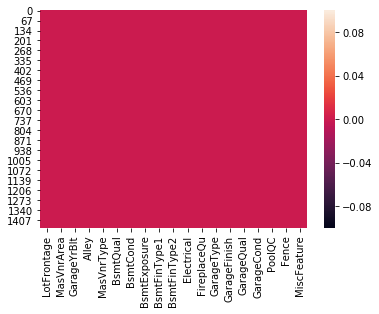

In [54]:
sns.heatmap(X_train_clean_miss_var.isnull())

In [55]:
X_train_clean_miss_var["FireplaceQu"].value_counts() 

Gd    1070
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [56]:
train["FireplaceQu"].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

# sir apke question ka answer

In [64]:
train1.update(X_train_clean_miss_var)

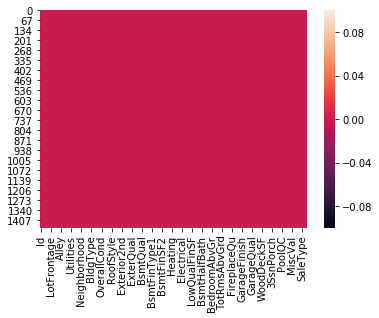

In [67]:
sns.heatmap(train1.isnull())

ye dataset upload ho chuka h 

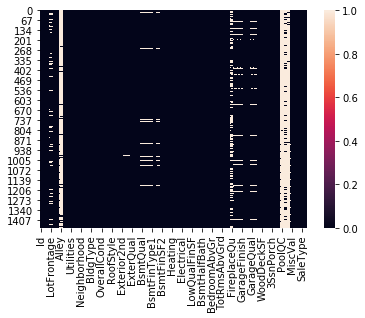

In [68]:
sns.heatmap(train.isnull())

Ye original dataset h isme null value h